### Package Installation ###

In [19]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install pandas

In [25]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


### Importing Packages ###

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

### Connection to DB ###

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "mudabbir",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

Connection to DB established!


In [5]:
cur = con.cursor()

# Query #

## Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table ##

### Q1.1: Find the division wise total_sale_price joining fact table and respective dimension table ###

In [1]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT s.division, SUM(f.total_price) as Total_Sales 
                FROM ecomdb_star_schema.fact_table as f
                INNER JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key 
                GROUP BY CUBE(s.division)
                ORDER BY Total_Sales"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
total_sales_by_division_df = pd.DataFrame(list(records), columns=['Division', 'Total Sales'])
total_sales_by_division_df

NameError: name 'PostgresConnection' is not defined

In [7]:
total_sales_by_division_df=total_sales_by_division_df.dropna()
total_sales_by_division_df

,Division,Total Sales
0,SYLHET,5512234.25
1,BARISAL,7520343.75
2,RANGPUR,8429836.50
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,CHITTAGONG,19763595.00
6,DHAKA,40764619.75


In [9]:
def changetype(x):
    x['Total Sales']=x['Total Sales'].astype('float64')  

In [9]:
changetype(total_sales_by_division_df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1388\3627962674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Total Sales']=x['Total Sales'].astype('float64')


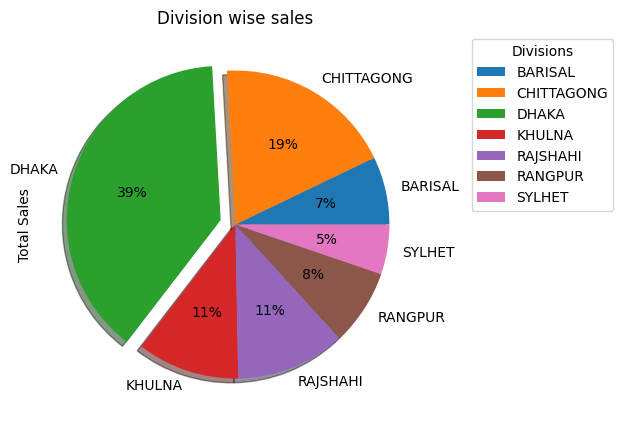

In [41]:
explode=[0, 0, 0.1, 0, 0, 0, 0]

total_sales_by_division_df.groupby(['Division']).sum().plot.pie(y='Total Sales', title='Division wise sales', autopct='%1.0f%%', figsize=(5,5),shadow ='True', explode=explode)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', title='Divisions')

### Q1.2: Find the district wise total_sale_price joining fact table and respective dimension table ###

In [43]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT s.district , SUM(f.total_price) as total_sales
FROM ecomdb_star_schema.fact_table as f
JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key 
GROUP BY CUBE(s.district) 
ORDER BY total_sales"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
total_sales_by_district_df = pd.DataFrame(list(records), columns=['District', 'Total Sales'])
total_sales_by_district_df

Connection to DB established!


,District,Total Sales
0,MEHERPUR,436755.00
1,NARAIL,440698.75
2,CHUADANGA,563909.75
3,JHALOKATI,570807.25
4,MAGURA,577543.25
...,...,...
60,RAJSHAHI,3756454.50
61,KHULNA,4081283.75
62,CHITTAGONG,7292985.50
63,DHAKA,23597621.00


In [44]:
total_sales_by_district_df=total_sales_by_district_df.dropna()
changetype(total_sales_by_district_df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1388\3627962674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Total Sales']=x['Total Sales'].astype('float64')


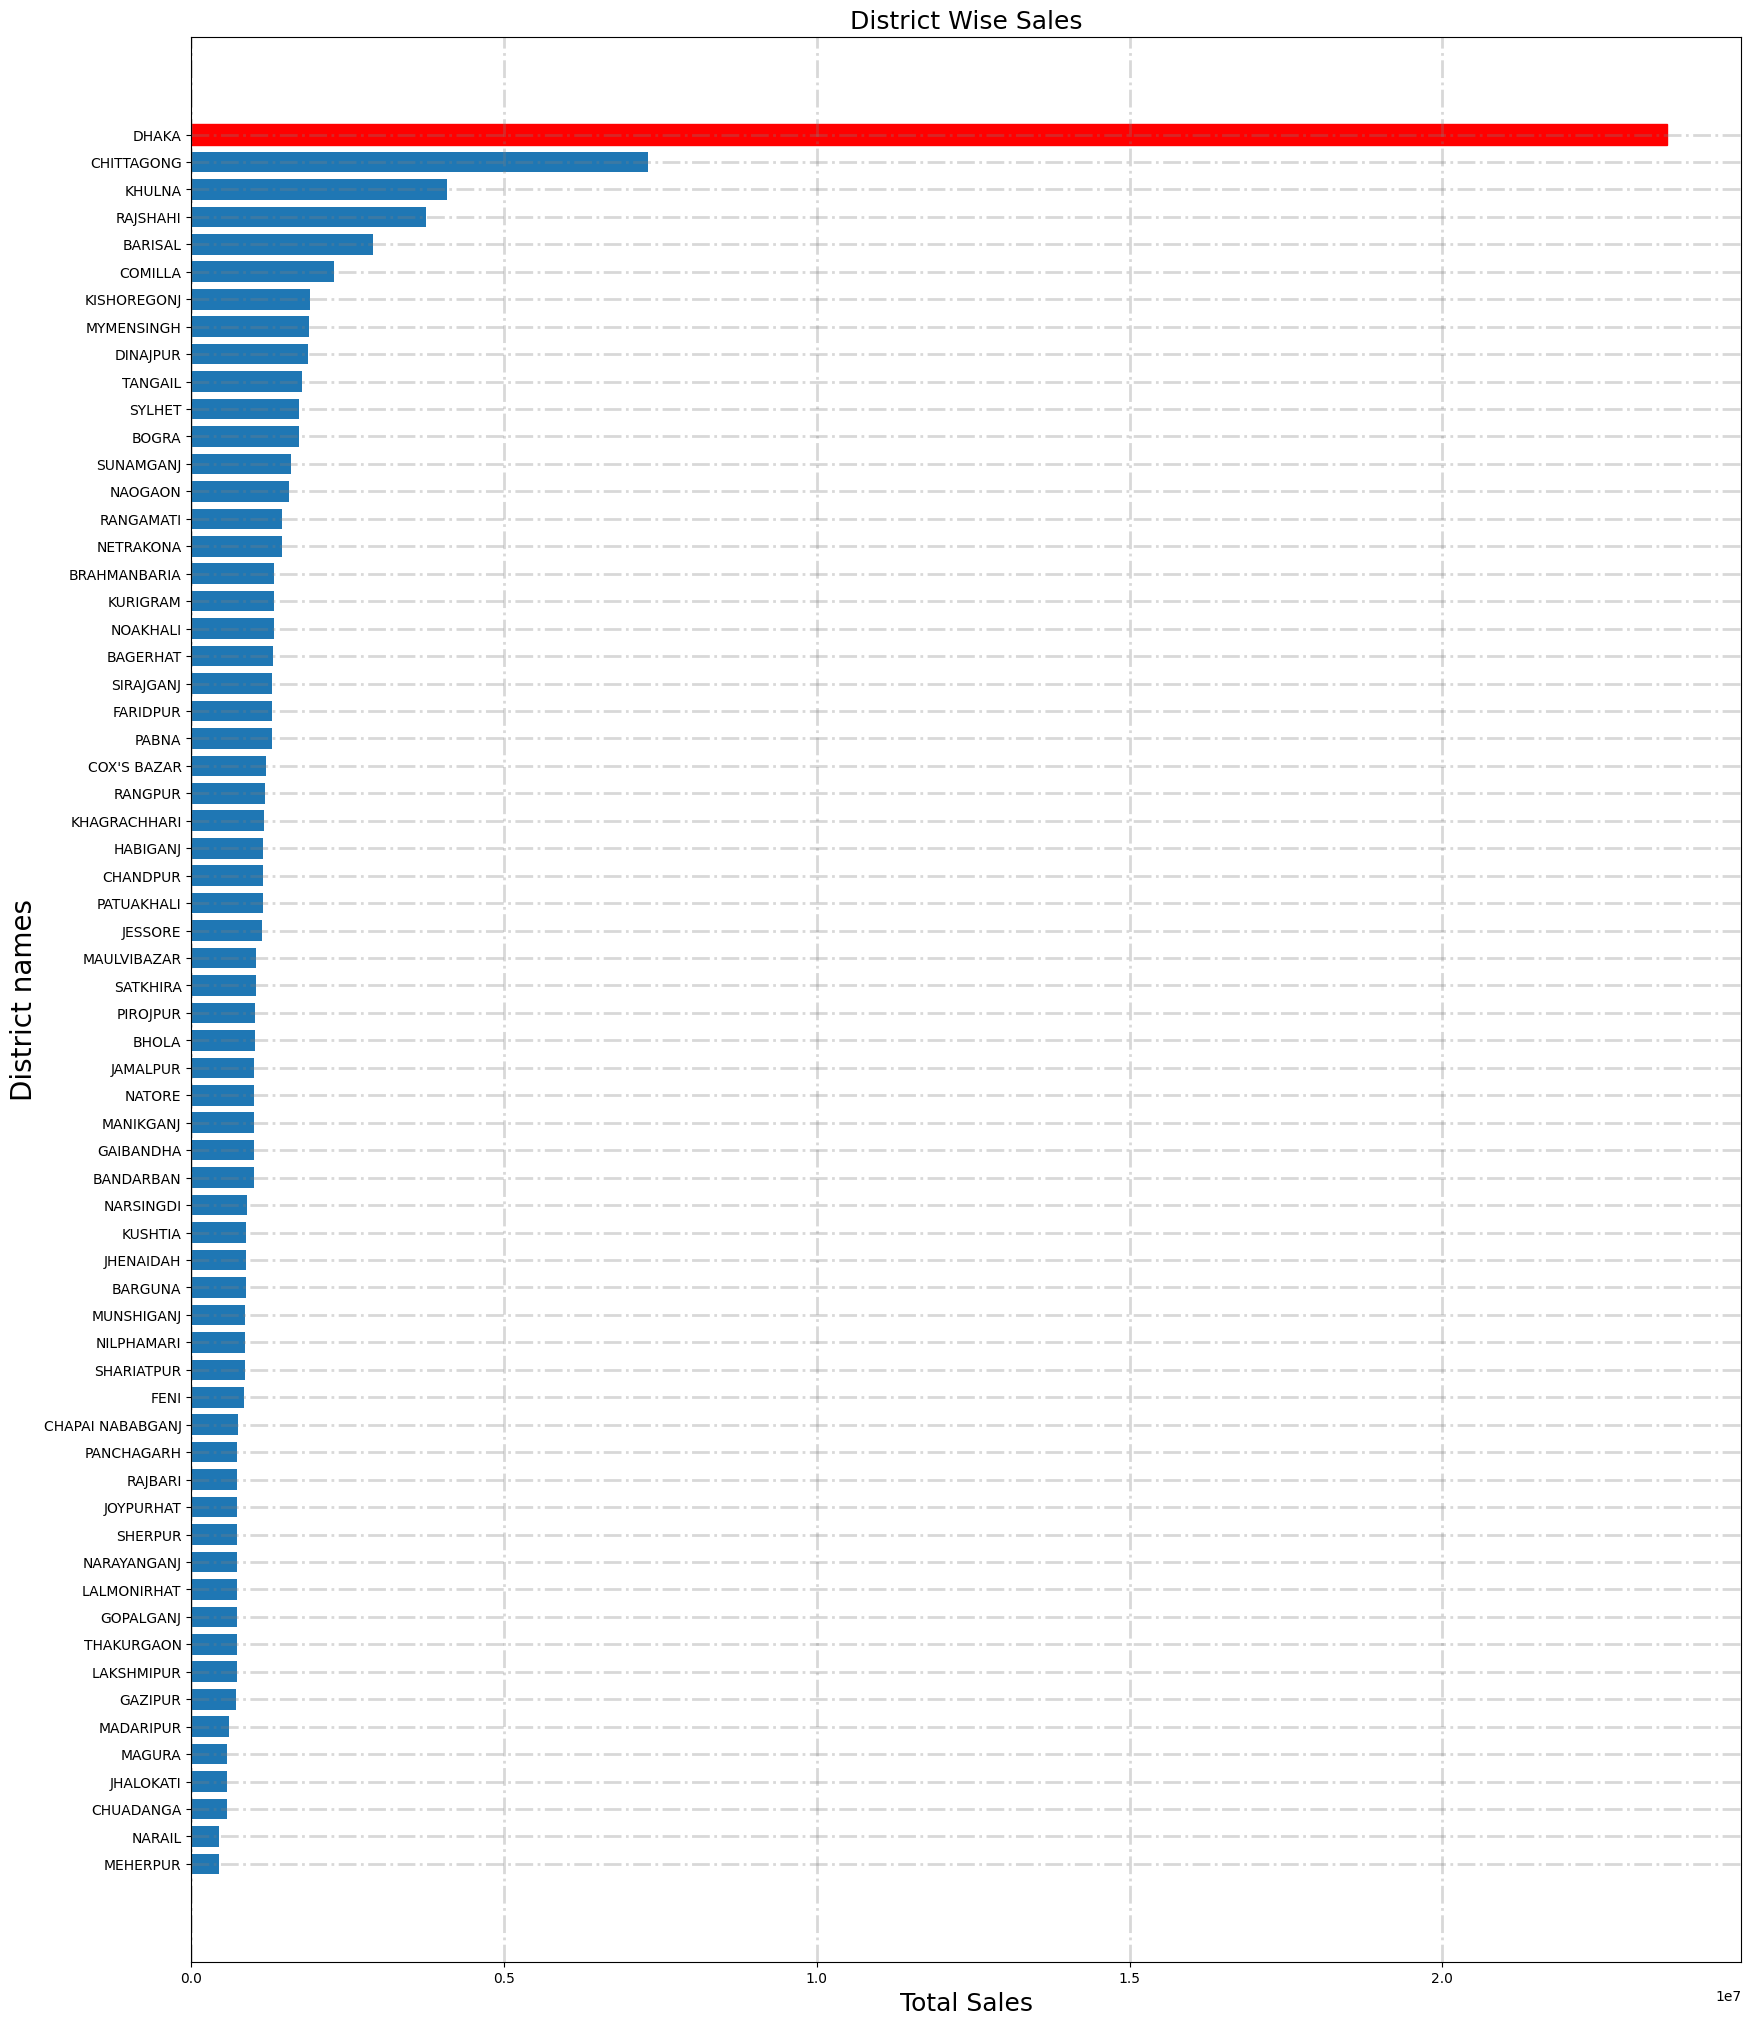

In [56]:
plt.figure(figsize = (20, 25))
bar=plt.barh(total_sales_by_district_df['District'],total_sales_by_district_df['Total Sales'], height=0.75)
bar[-1].set_color('r')
plt.grid(visible=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.title('District Wise Sales' , fontsize=18)
plt.xlabel('Total Sales', fontsize=18)
plt.ylabel('District names', fontsize=20)
plt.show()

### Q1.3: Find the year wise total_sale_price joining fact table and respective dimension table ###

In [48]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT t.year , SUM(f.total_price) as Total_Sales 
FROM ecomdb_star_schema.fact_table as f
JOIN ecomdb_star_schema.time_dim as t ON t.time_key = f.time_key 
GROUP BY t.year 
ORDER BY t.year"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
year_wise_sales_df = pd.DataFrame(list(records), columns=['Year', 'Sales'])
year_wise_sales_df

Connection to DB established!


,Year,Sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25


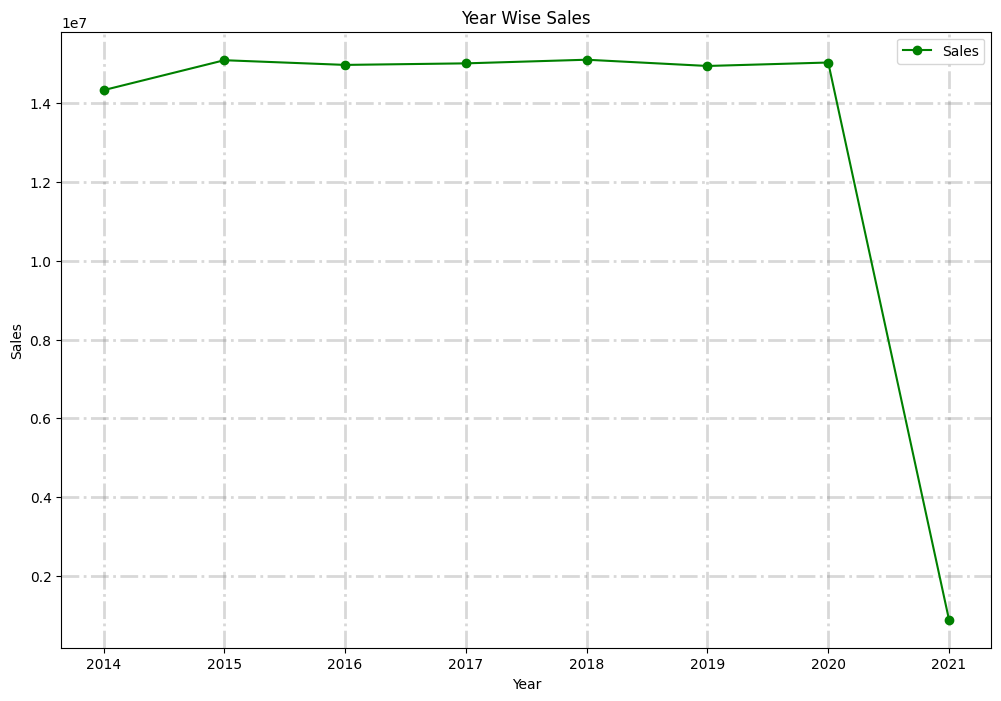

In [61]:
plt.figure(figsize = (12, 8))
plt.title('Year Wise Sales')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Sales', fontsize=10)
x=year_wise_sales_df['Year']
y=year_wise_sales_df['Sales']
plt.grid(visible=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.plot(x, y, color = 'g', linestyle = 'solid', marker = 'o', label = "Sales")
plt.legend()
plt.show()
#sns.pointplot(data=year_wise_sales_df,x='Year',y='Sales',color='GREEN')

### Q1.4: Find the month wise total_sale_price joining fact table and respective dimension table ###

In [6]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT t.month , SUM(f.total_price) as Total_Sales
FROM ecomdb_star_schema.fact_table as f 
JOIN ecomdb_star_schema.time_dim as t ON t.time_key = f.time_key 
GROUP BY CUBE(t.month)
ORDER BY t.month""" 
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
month_wise_sales_df = pd.DataFrame(list(records), columns=['Month', 'Total Sales'])
month_wise_sales_df

Connection to DB established!


,Month,Total Sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [7]:
month_wise_sales_df=month_wise_sales_df.dropna()

In [10]:
changetype(month_wise_sales_df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21424\3627962674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Total Sales']=x['Total Sales'].astype('float64')


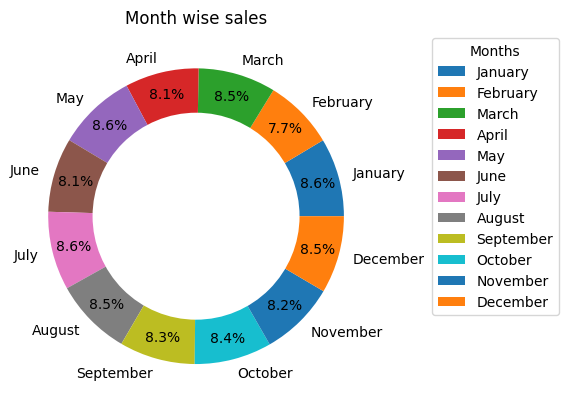

In [12]:
# Setting size in Chart based on
# given values
sizes = month_wise_sales_df['Total Sales']

# Setting labels for items in Chart
labels =['January', 'February', 'March', 'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 'November', 'December'] 

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F',
		'#FFA500']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(sizes, labels=labels,
		autopct='%1.1f%%', pctdistance=0.85)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Month wise sales')

# Add Legends
plt.legend(labels, bbox_to_anchor=(1.5, 1), loc="upper right", title="Months")

# Displaying Chart
plt.show()


## Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table ##

### Q2.1: Find the customer wise total_sale_price joining fact table and respective dimension table ###

In [102]:
con = PostgresConnection().getConnection()
cur = con.cursor()
insert_stmts = "SELECT customer_dim.name, SUM(fact_table.total_price) " \
              "FROM ecomdb_star_schema.fact_table " \
              "JOIN ecomdb_star_schema.customer_dim on customer_dim.customer_key=fact_table.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim on trans_dim.payment_key=fact_table.payment_key " \
                "GROUP BY CUBE (customer_dim.name) " \
                "ORDER BY SUM(fact_table.total_price)desc"
cur.execute(insert_stmts)
records_customer = cur.fetchall()
customer_df = pd.DataFrame(list(records_customer), columns=['Name', 'Total Sales'])
customer_df

Connection to DB established!


,Name,Total Sales
0,None,105401435.75
1,pooja,2109800.75
2,jyoti,1331696.25
3,neha,996121.00
4,sunita,915543.75
...,...,...
4533,ahsamin @ juhi,7554.25
4534,smt sujata,7496.25
4535,meenaxi,7113.50
4536,bahwana,7105.50


In [104]:
customer_df=customer_df.dropna()
changetype(customer_df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1388\2195928826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_v2.sort_values(by=["Total Sales"],inplace=True)


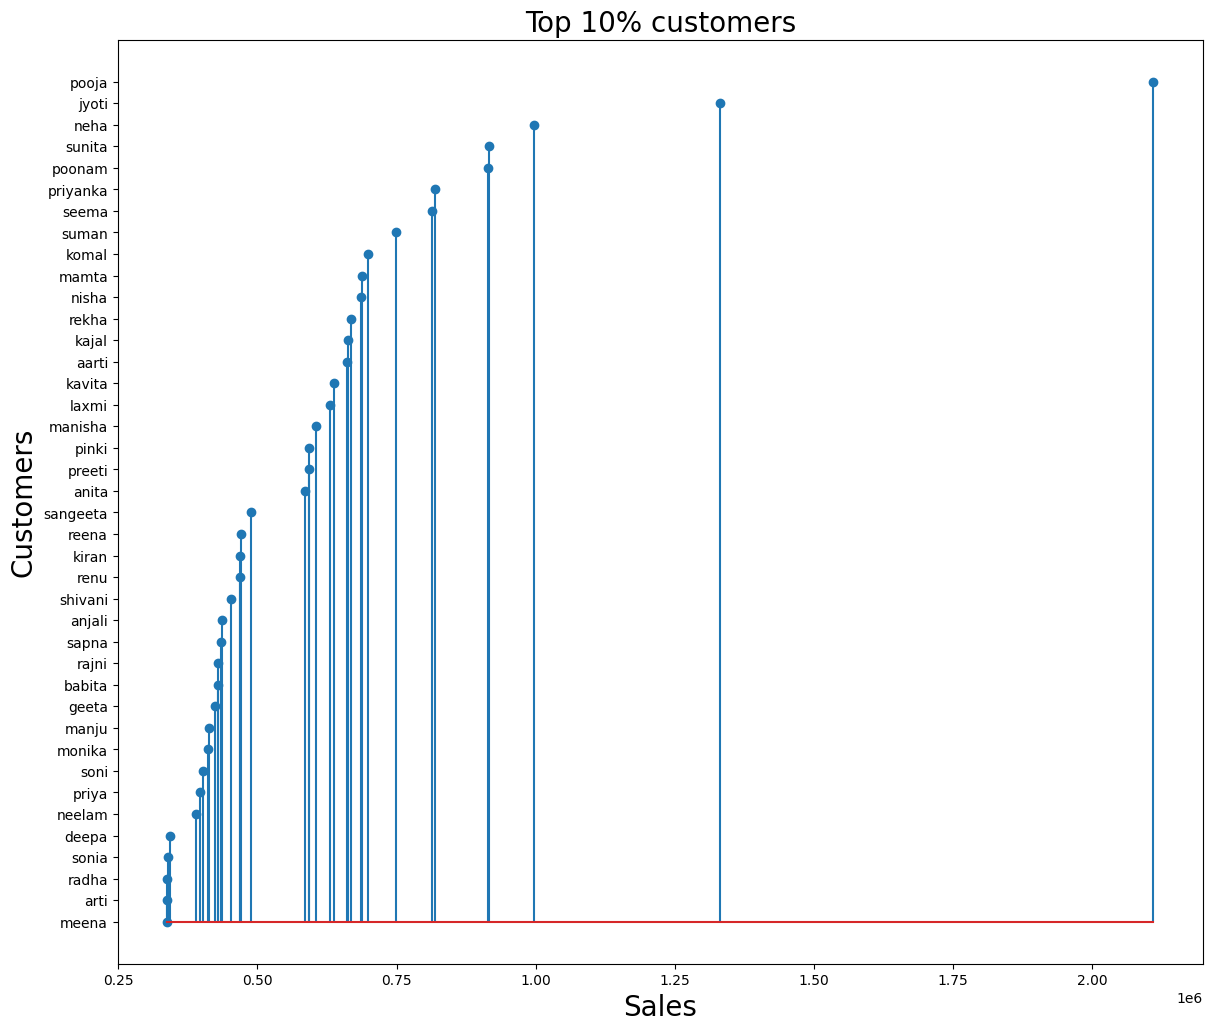

In [113]:
customer_df_v2=customer_df[:40]
plt.figure(figsize = (14, 12))
plt.title('Top 10% customers',fontsize=20)
plt.ylabel('Customers',fontsize=20)
plt.xlabel('Sales',fontsize=20)
customer_df_v2.sort_values(by=["Total Sales"],inplace=True)
#plt.plot(bank.sales,bank.bank_name, linestyle = 'solid')
#sns.pointplot(x=bank.sales,y=bank.bank_name,color='r')
plt.stem(customer_df_v2['Total Sales'],customer_df_v2['Name'])
plt.show()


### Q2.2: Find the bank wise total_sale_price joining fact table and respective dimension table ###

In [121]:
con = PostgresConnection().getConnection()
cur = con.cursor()
insert_stmts = "SELECT trans_dim.bank_name, SUM(fact_table.total_price) " \
              "FROM ecomdb_star_schema.fact_table " \
              "JOIN ecomdb_star_schema.customer_dim on customer_dim.customer_key=fact_table.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim on trans_dim.payment_key=fact_table.payment_key " \
                "GROUP BY CUBE (trans_dim.bank_name) " \
                "ORDER BY trans_dim.bank_name"
cur.execute(insert_stmts)
records_bank = cur.fetchall()
bank_df = pd.DataFrame(list(records_bank), columns=['Bank name', 'Total Sales'])
bank_df

Connection to DB established!


,Bank name,Total Sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [157]:
bank_df=bank_df.dropna()
changetype(bank_df)

<AxesSubplot:xlabel='Total Sales', ylabel='Bank name'>

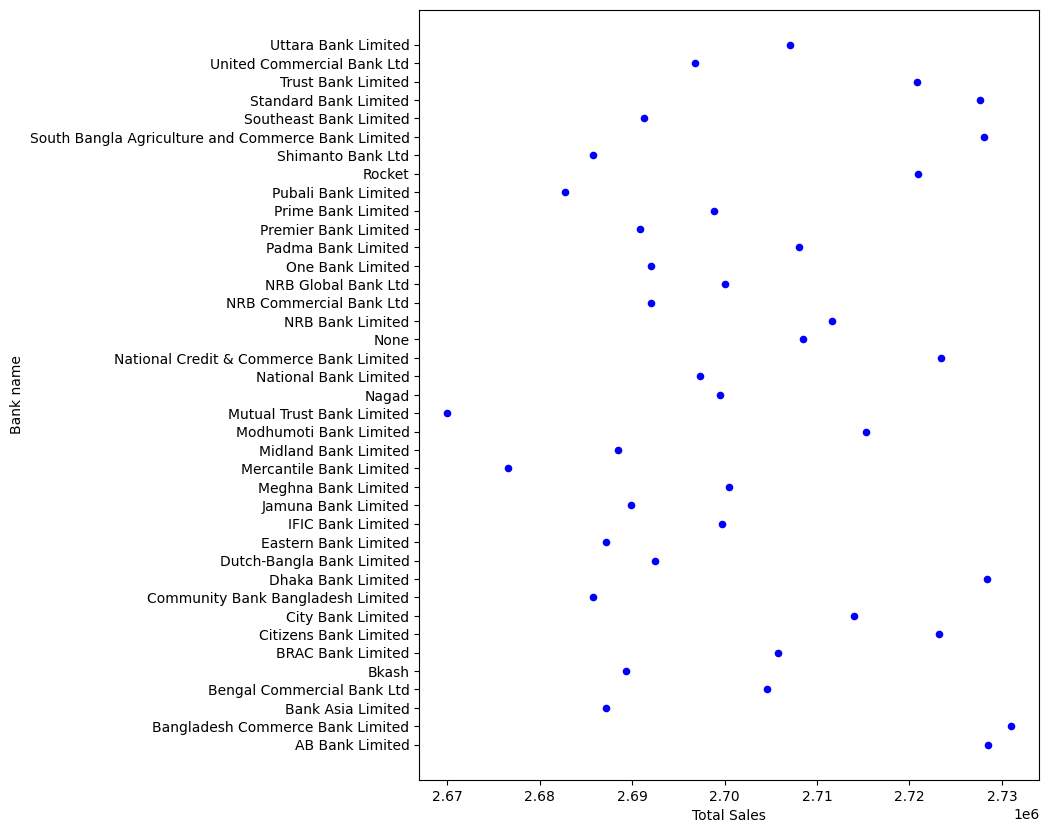

In [156]:

bank_df.plot.scatter(x ='Total Sales', y='Bank name',  c='blue', figsize = (8, 10))

### Q2.3: Find the transaction wise total_sale_price joining fact table and respective dimension table ###

In [57]:
con = PostgresConnection().getConnection()
cur = con.cursor()
insert_stmts = "SELECT trans_dim.trans_type, SUM(fact_table.total_price) " \
              "FROM ecomdb_star_schema.fact_table " \
              "JOIN ecomdb_star_schema.customer_dim on customer_dim.customer_key=fact_table.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim on trans_dim.payment_key=fact_table.payment_key " \
                "GROUP BY CUBE (trans_dim.trans_type) " \
                "ORDER BY trans_dim.trans_type"
cur.execute(insert_stmts)
records_type = cur.fetchall()
type_df = pd.DataFrame(list(records_type), columns=['Type', 'Total Sales'])
type_df

Connection to DB established!


,Type,Total Sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50
3,None,105401435.75


In [58]:
type_df=type_df.dropna()
changetype(type_df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21424\3627962674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Total Sales']=x['Total Sales'].astype('float64')


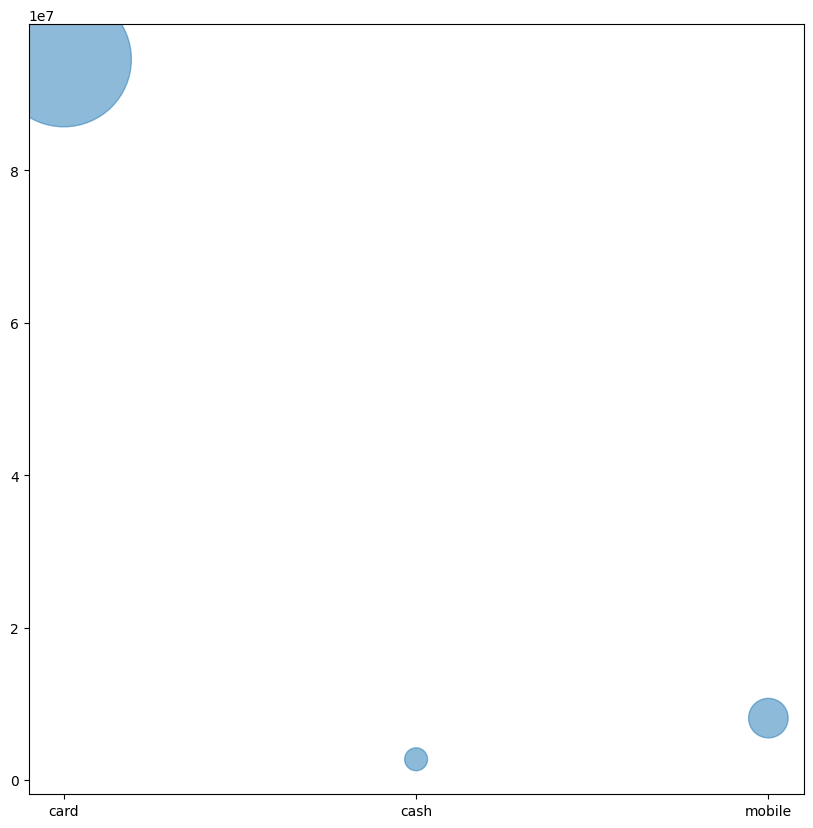

In [59]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(type_df["Type"], type_df["Total Sales"], 
            s=type_df["Total Sales"]*0.0001, alpha=0.5)
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'card'), Text(1, 0, 'cash'), Text(2, 0, 'mobile')])

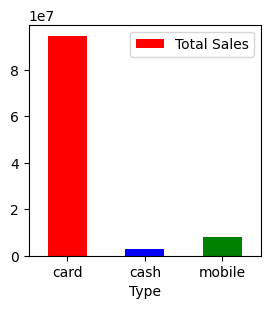

In [63]:

type_df.plot.bar(x ='Type', y='Total Sales', figsize = (3,3), color=['red', 'blue', 'green'])
plt.xticks(rotation=0, horizontalalignment="center")

### Q3: Total sales in Barisal ###

In [8]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "WHERE s.district='BARISAL' "\
                "GROUP BY CUBE(s.district) "\
                "ORDER BY s.district"
cur.execute(select_stmt)
records_barisal = cur.fetchall()
records_barisal
barisal_df = pd.DataFrame(list(records_barisal), columns=['Division', 'Sales'])
barisal_df=barisal_df.dropna()
barisal_df

Connection to DB established!


,Division,Sales
0,BARISAL,2897237.75


### Q4: Total sales in 2015 ###

In [28]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.year=2015  "\
                "GROUP BY CUBE(tim.year) "\
                "ORDER BY tim.year"
cur.execute(select_stmt)
records = cur.fetchall()
y2015_df = pd.DataFrame(list(records), columns=['Year', 'Sales'])
y2015_df=y2015_df.dropna()
y2015_df

Connection to DB established!


,Year,Sales
0,2015.0,15095720.25


### Q5: Total sales of Barisal in 2015 ###

In [9]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.year, s.district, SUM(f.total_price) as total_sale_price " \
"FROM ecomdb_star_schema.fact_table as f "\
"JOIN ecomdb_star_schema.time_dim as t ON t.time_key = f.time_key " \
"JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key "\
"WHERE t.year = 2015 and s.district = 'BARISAL' "\
"GROUP BY CUBE(t.year, s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
barisal_2015_df = pd.DataFrame(list(records), columns=['Year', 'Division', 'Sales'])
barisal_2015_df=barisal_2015_df.dropna()
barisal_2015_df

Connection to DB established!


,Year,Division,Sales
0,2015.0,BARISAL,415748.75


### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?
S1-> item1 -> quantity_sales

S1-> item2 -> quantity_sales

S1-> item3 -> quantity_sales

In [74]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT s.store_key , i.item_name, sum(f.quantity) as quantity_sales_for_each_item " \
"FROM ecomdb_star_schema.fact_table as f "\
"JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key " \
"JOIN ecomdb_star_schema.item_dim as i ON i.item_key = f.item_key "\
"GROUP BY CUBE(s.store_key, i.item_name)"\
"ORDER BY s.store_key, quantity_sales_for_each_item desc"
                
curr.execute(select_stmts)
records = curr.fetchall()
records
top_three_products_sold_df=pd.DataFrame(list(records), columns=['Store Key','Item Name','Quantity Sold'])
top_three_products_sold_df=top_three_products_sold_df.dropna()
top_three_products_sold_df=top_three_products_sold_df.groupby('Store Key').head(3)
top_three_products_sold_df=top_three_products_sold_df[:30]
top_three_products_sold_df

Connection to DB established!


,Store Key,Item Name,Quantity Sold
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
261,S0002,Hefty Supreme Foam Bowls 12oz,78
518,S0003,Sprite - 12 oz cans,122
519,S0003,Diet Coke - 12 oz cans,109
520,S0003,Muscle Milk Protein Shake Van. 11oz,76
777,S0004,Kind Bars Variety Pack 1.4 oz,79


In [75]:
def changetype(x):
    x['Quantity Sold']=x['Quantity Sold'].astype('float64')  
changetype(top_three_products_sold_df)

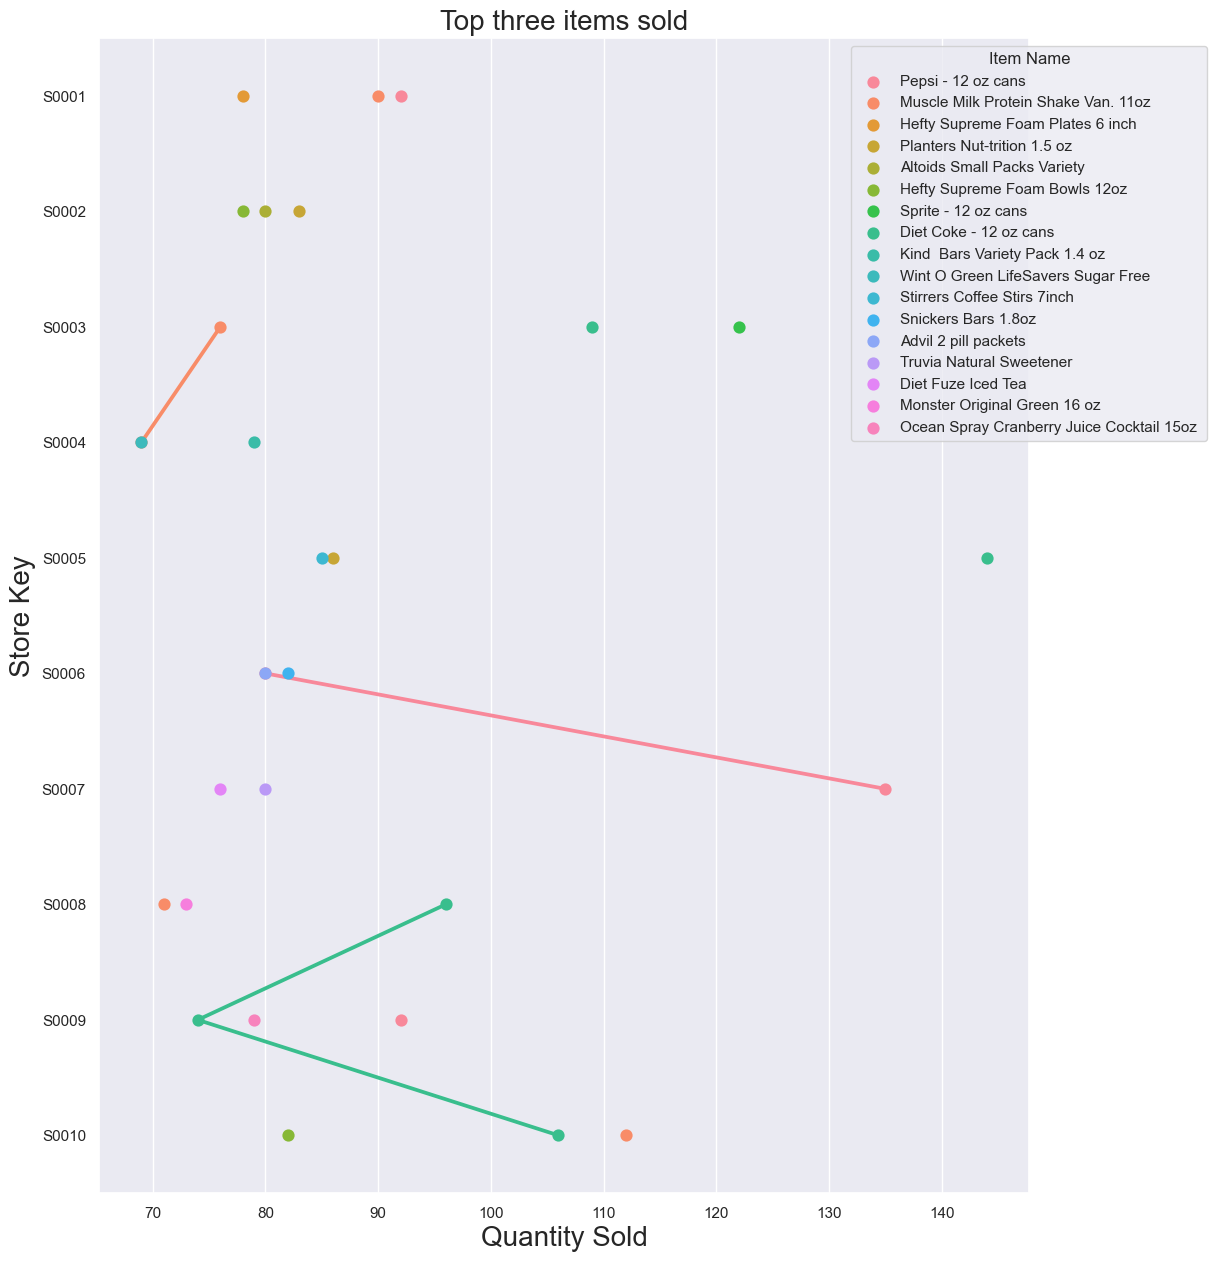

In [233]:
ax_dims = (12, 15)
fig, ax = plt.subplots(figsize=ax_dims)

#sns.set_theme()
sns.set(font_scale = 3)
sns.set_context("notebook")
plt.title('Top three items sold',fontsize=20)
plt.xlabel('Store Key',fontsize=20)
plt.ylabel('Quantity Sold',fontsize=20)

#sns.set_style("darkgrid")
#sns.axes_style("white")
sns.pointplot(x=top_three_products_sold_df['Quantity Sold'],y=top_three_products_sold_df['Store Key'],
            hue=top_three_products_sold_df['Item Name'])
plt.legend(loc='upper right', title='Item Name', bbox_to_anchor=(1.2, 1))

### Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [54]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT item_dim.item_name,trans_dim.trans_type, time_dim.date,SUM(fact_table.quantity)  
FROM ecomdb_star_schema.fact_table 
JOIN ecomdb_star_schema.item_dim ON
item_dim.item_key = fact_table.item_key 
JOIN ecomdb_star_schema.trans_dim ON
trans_dim.payment_key = fact_table.payment_key
JOIN ecomdb_star_schema.time_dim ON
time_dim.time_key = fact_table.time_key
WHERE trans_dim.trans_type='mobile'and time_dim.date> NOW()-INTERVAL'5 days' 
GROUP BY CUBE (item_dim.item_name,trans_dim.trans_type,time_dim.date)
ORDER BY time_dim.date DESC"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records
n_days_products_sale_quantity_df=pd.DataFrame(list(records), columns=['Item Name','trans_type','Date-Time','Quantity'])
n_days_products_sale_quantity_df=n_days_products_sale_quantity_df.dropna()
n_days_products_sale_quantity_df

Connection to DB established!


,Item Name,trans_type,Date-Time,Quantity


### Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [176]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT item_dim.item_name, time_dim.quarter, sum(fact_table.quantity)  
            FROM ecomdb_star_schema.fact_table 
            JOIN ecomdb_star_schema.item_dim ON
            item_dim.item_key = fact_table.item_key 
            JOIN ecomdb_star_schema.time_dim ON
            time_dim.time_key = fact_table.time_key
            GROUP BY CUBE (item_dim.item_name, time_dim.quarter)
            ORDER BY  item_dim.item_name, sum(fact_table.quantity) desc"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records
worst_season_df = pd.DataFrame(list(records), columns=['Item Name', 'Quarter','Quantity Sold'])
worst_season_df=worst_season_df.dropna()
worst_season_df=worst_season_df.groupby('Item Name').head(1)
worst_season_df=worst_season_df=worst_season_df[:15]
worst_season_df

Connection to DB established!


,Item Name,Quarter,Quantity Sold
1,100% Juice Box Variety 6.75 oz,Q3,6045
6,A&W Root Beer - 12 oz cans,Q3,6103
11,A&W Root Beer Diet - 12 oz cans,Q1,6026
16,Advil 2 pill packets,Q4,6025
21,All Purpose Cleaner 409 Spray,Q4,5890
26,Altoids Small Packs Variety,Q2,5885
31,Apple Sauce Variety GoGO Squeeze 3.2oz,Q3,5741
36,AquaFina Purified Drinking Water 16oz,Q3,5888
41,Austin Cookie Cracker Variety,Q2,5881
46,Austin Toasty Crackers w/ PBtr,Q4,6133


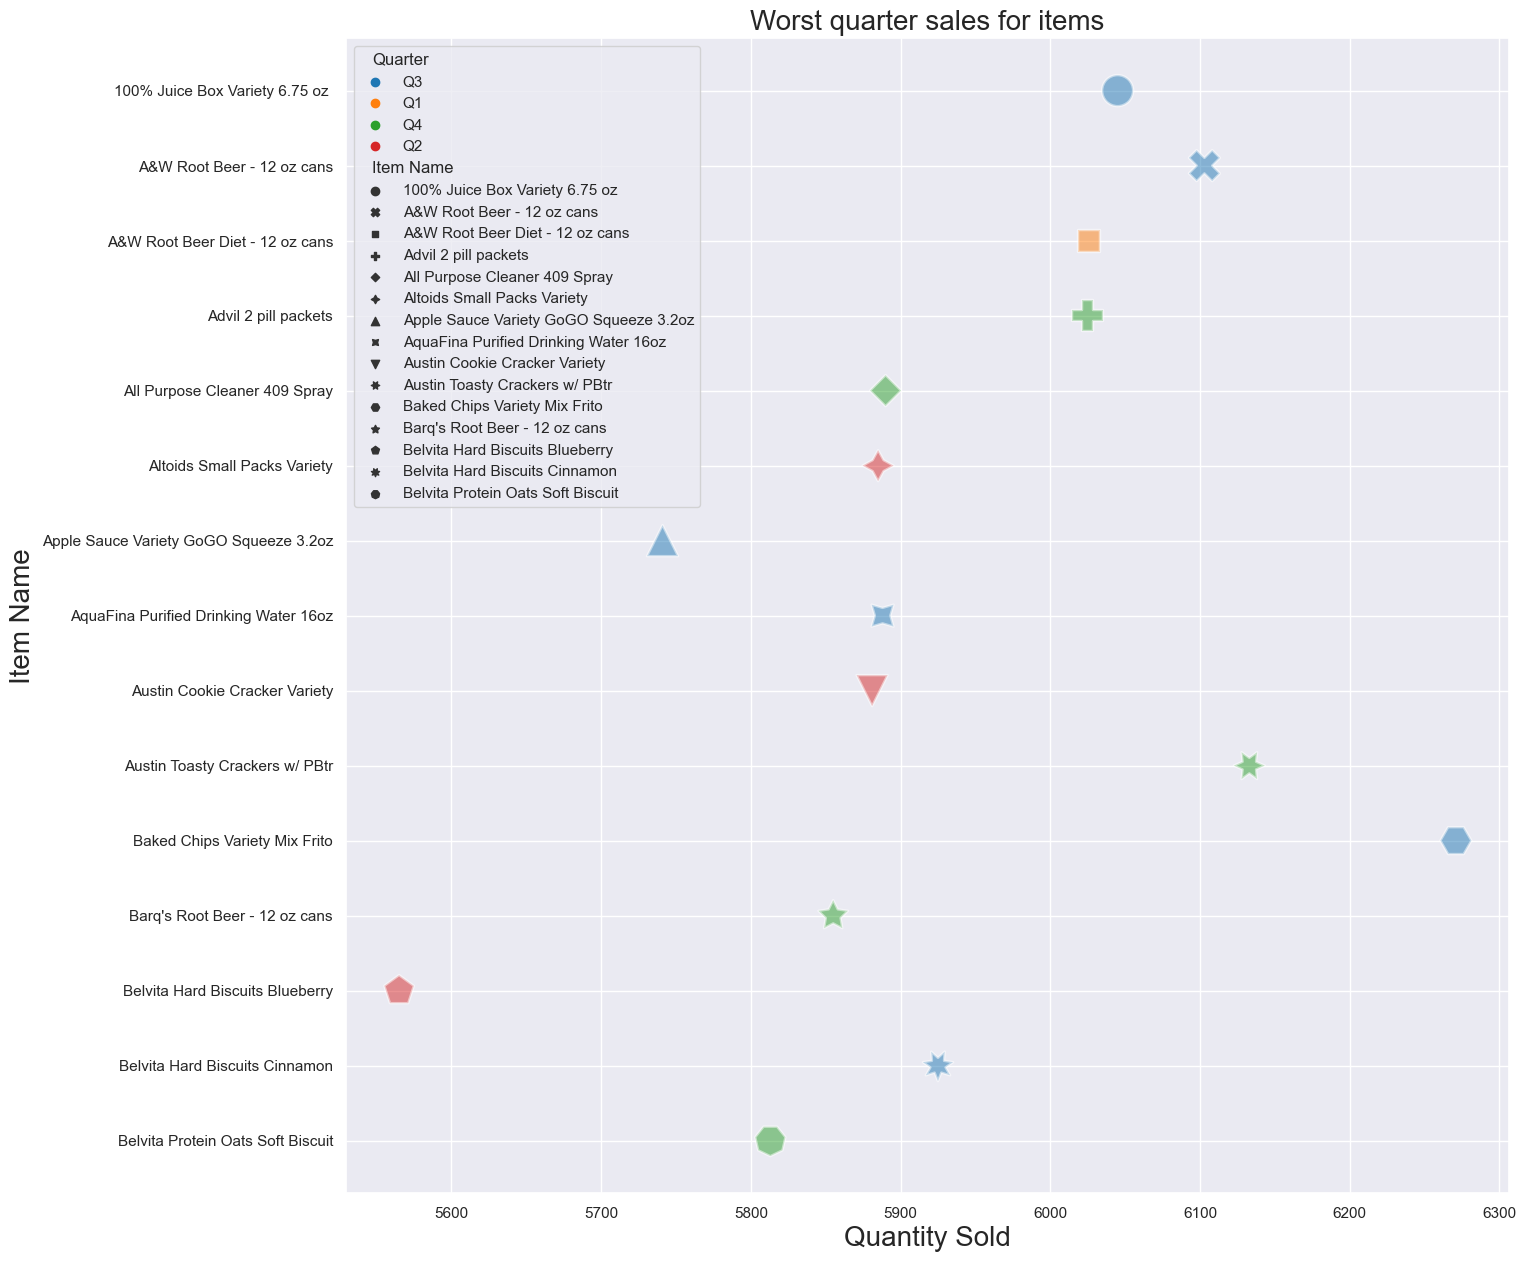

In [184]:
plt.figure(figsize = (15,15))
#plt.title('Year Wise Sales')
plt.title('Worst quarter sales for items',fontsize=20)
plt.ylabel('Item Name',fontsize=20)
plt.xlabel('Quantity Sold',fontsize=20)
sns.scatterplot(data=worst_season_df, x="Quantity Sold", y="Item Name", hue="Quarter",palette='tab10',s=500,style="Item Name", alpha=0.5)
sns.set(font_scale = 1)

### Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT item_dim.item_name,store_dim.division,SUM(fact_table.quantity)  
FROM ecomdb_star_schema.fact_table 
JOIN ecomdb_star_schema.store_dim ON
store_dim.store_key = fact_table.store_key
JOIN ecomdb_star_schema.item_dim ON
item_dim.item_key = fact_table.item_key
GROUP BY CUBE (store_dim.division,item_dim.item_name)
ORDER BY item_dim.item_name,store_dim.division """
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
item_div_df = pd.DataFrame(list(records), columns=['Item', 'Division', 'Quantity Sold'])
item_div_df = item_div_df.dropna()
item_div_df=item_div_df.head(70)
item_div_df

Connection to DB established!


,Item,Division,Quantity Sold
0,100% Juice Box Variety 6.75 oz,BARISAL,1586
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,4330
2,100% Juice Box Variety 6.75 oz,DHAKA,9413
3,100% Juice Box Variety 6.75 oz,KHULNA,2517
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,2582
...,...,...,...
74,Austin Toasty Crackers w/ PBtr,DHAKA,8519
75,Austin Toasty Crackers w/ PBtr,KHULNA,2775
76,Austin Toasty Crackers w/ PBtr,RAJSHAHI,2559
77,Austin Toasty Crackers w/ PBtr,RANGPUR,1619


<AxesSubplot:title={'center':'Division wise sales of items'}, xlabel='Quantity Sold', ylabel='Item'>

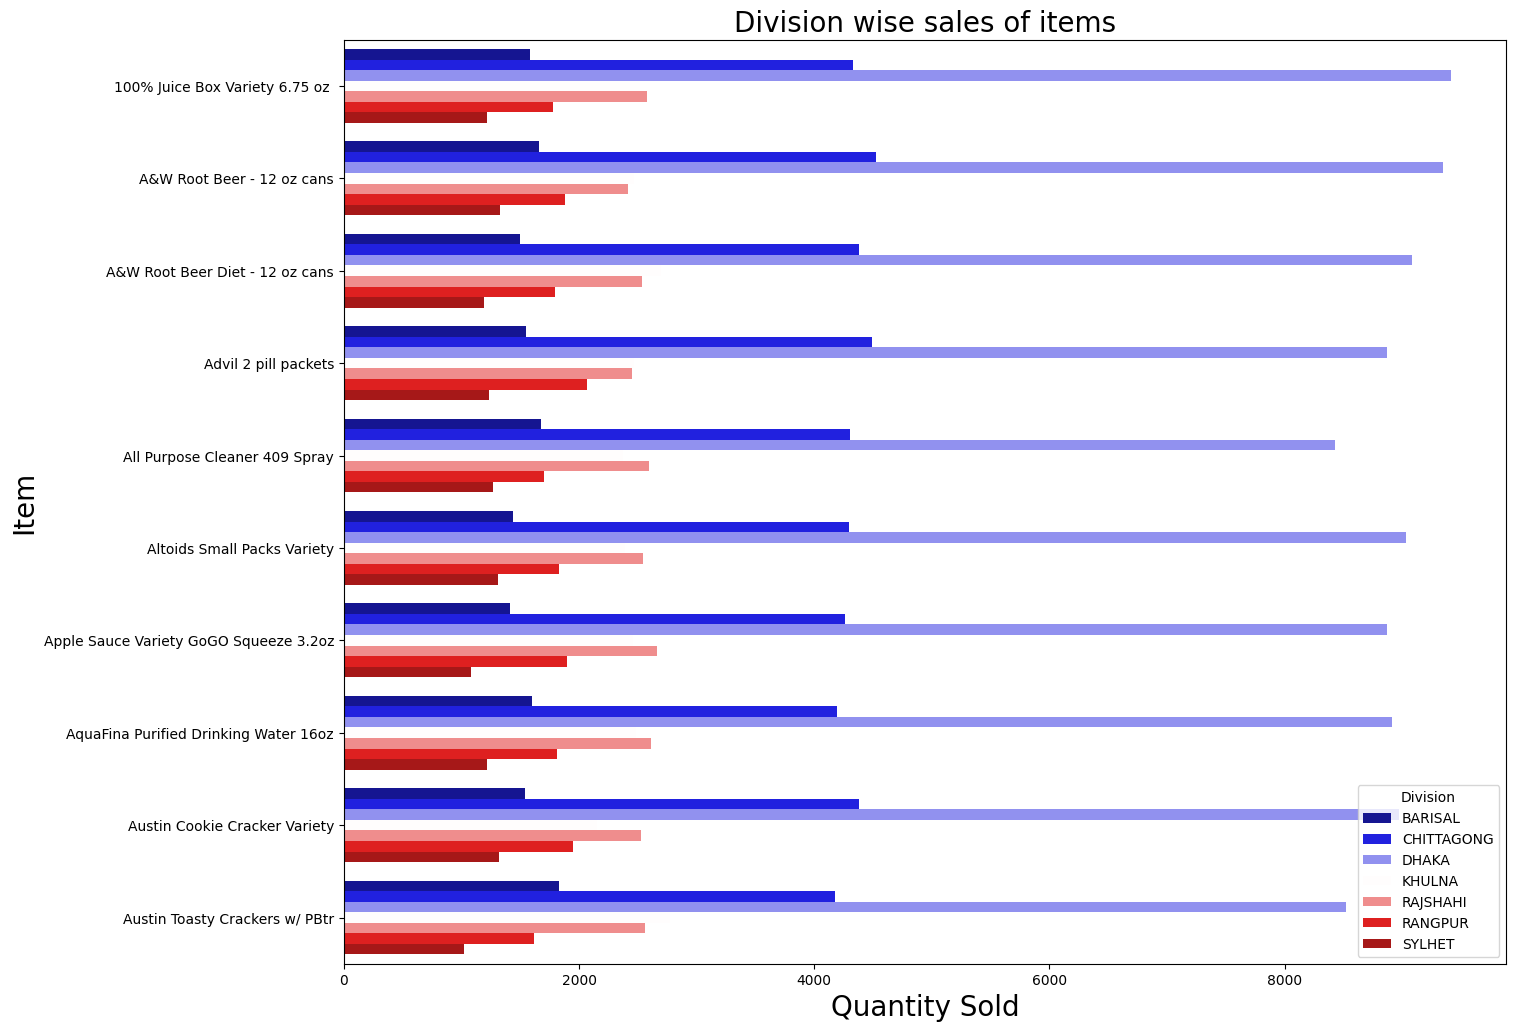

In [7]:

a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set(font_scale = 1)
plt.title('Division wise sales of items',fontsize=20)
plt.xlabel('Item Name',fontsize=20)
plt.ylabel('Quantity',fontsize=20)

#sns.set_style("darkgrid")
#sns.axes_style("white")
sns.barplot(data=item_div_df,x='Quantity Sold',y='Item',hue='Division',ax=ax,palette='seismic')

### Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

     S1-> M2 -> avg_sales

In [67]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT store_dim.store_key, time_dim.month, AVG(fact_table.total_price)  
FROM ecomdb_star_schema.fact_table 
JOIN ecomdb_star_schema.store_dim ON
store_dim.store_key = fact_table.store_key
JOIN ecomdb_star_schema.time_dim ON
time_dim.time_key = fact_table.time_key
GROUP BY CUBE (store_dim.store_key,time_dim.month)
ORDER BY store_dim.store_key,time_dim.month"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
avg_mon_df = pd.DataFrame(list(records), columns=['Store Key', 'Month', 'Average Sales'])
avg_mon_df=avg_mon_df.dropna()

avg_mon_df

Connection to DB established!


,Store Key,Month,Average Sales
0,S0001,1.0,97.7543103448275862
1,S0001,2.0,100.5776699029126214
2,S0001,3.0,109.4158878504672897
3,S0001,4.0,98.8805309734513274
4,S0001,5.0,99.5245535714285714
...,...,...,...
9432,S0099,8.0,96.2933673469387755
9433,S0099,9.0,114.1365740740740741
9434,S0099,10.0,102.7897727272727273
9435,S0099,11.0,107.3810679611650485


In [72]:
def changetype(x):
    x['Average Sales']=x['Average Sales'].astype('float64')  
changetype(avg_mon_df)
avg_mon_df.round({"Average Sales":0})
avg_mon_df

,Store Key,Month,Average Sales
0,S0001,1.0,97.754310
1,S0001,2.0,100.577670
2,S0001,3.0,109.415888
3,S0001,4.0,98.880531
4,S0001,5.0,99.524554
...,...,...,...
9432,S0099,8.0,96.293367
9433,S0099,9.0,114.136574
9434,S0099,10.0,102.789773
9435,S0099,11.0,107.381068


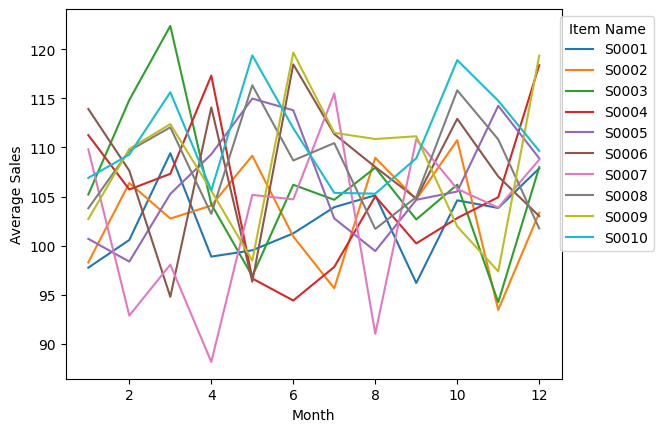

In [9]:
avg_mon_df=avg_mon_df[:120]
sns.lineplot(data=avg_mon_df, x="Month", y="Average Sales", hue="Store Key")
plt.legend(loc='upper right', title='Item Name', bbox_to_anchor=(1.2, 1))